## Loading Packages and Functions

Running the following code will allow you to import functions from the code/ folder of the repository

In [4]:
import sys
from pathlib import Path

# Automatically detect the repo root by looking for the 'code' folder
current = Path.cwd().resolve()
while current != current.parent:
    if (current / "code").exists():
        repo_root = current
        break
    current = current.parent

# Add repo root to sys.path
if str(repo_root) not in sys.path:
    sys.path.insert(0, str(repo_root))

# Add code directory explicitly
code_dir = repo_root / "code"
if str(code_dir) not in sys.path:
    sys.path.insert(0, str(code_dir))

After making sure you can import functions from the code/ folder, run the below cell to import all necessary libraries and functions. 

In [ ]:
# Basic data science packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Package to obtain financial data
import yfinance as yf

# Some basic statistical tools
from sklearn.preprocessing import StandardScaler

# Pretrained sentiment analysis model
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Import the functions from .py files 
from data_preprocessing import *

# Define the sectors to use
sectors = ['XLK', 'XLF', 'XLE', 'XLV', 'XLI', 'XLY', 'XLP', 'XLU', 'XLB']

## Exploratory Data Analysis for Market Sector ETF Price Prediction Project

This is a demo notebook that walks you through loading and cleaning the data for the Market Sector ETF Price Prediction Project. This demo will explore some interesting visualizations and results from conducting exploratory data analysis on the data.

The first step is to obtain and clean all of the data. The functions necessary to do this are in the `code\data_preprocessing.py` file of the repository. To see details on how the data loading and cleaning is conducted, refer to the file.

The next few cells walk you through collecting and cleaning the data, using each of the functions from the `.py` file.

#### Loading the Data

**Step 1:** The first step is to pull the raw financial and news headlines data. The financial data (prices and volumes for the 9 stocks) are downloaded from the `yfinance` package, and the news headlines are taken from the `News_Category_Dataset_v3.json` file which should be downloaded from the link in the README file in the main repository. News headlines under following `category` names are kept, and all others are discarded: business, money, tech, world news, US news, environment, science.

In [ ]:
# Obtaining the financial data using Yahoo Finance package
df_financial = download_financial_data()

print("\nFirst 5 rows of financial data:")
df_financial.head()


---Financial Data Info---
Date range: 2012-01-30 00:00:00 to 2022-09-21 00:00:00
Total trading days: 2680
Number of sectors in data: 9
Number of features per sector: 15
Total number of financial features: 45

First 5 rows of financial data:


,XLK_Open,XLK_High,XLK_Low,XLK_Close,XLK_Volume,XLF_Open,XLF_High,XLF_Low,XLF_Close,XLF_Volume,...,XLU_Open,XLU_High,XLU_Low,XLU_Close,XLU_Volume,XLB_Open,XLB_High,XLB_Low,XLB_Close,XLB_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-30,22.201755,22.493117,22.185106,22.459818,7691200,8.809803,8.847640,8.753046,8.828721,71714490,...,21.803422,21.803422,21.614376,21.746708,9475100,27.621655,28.119478,27.561314,28.013880,9225700
2012-01-31,22.609665,22.617990,22.368252,22.501446,8089300,8.885480,8.898093,8.803499,8.866561,82584343,...,21.797124,21.860138,21.715203,21.853838,7359900,28.240165,28.308050,27.772514,28.044054,11363800
2012-02-01,22.717886,22.826106,22.634640,22.726210,8972400,8.942232,9.068357,8.942232,9.005295,87912357,...,21.904246,21.979867,21.860135,21.929453,8196500,28.270332,28.504160,28.255246,28.323132,15190200
2012-02-02,22.809452,22.876049,22.726205,22.784479,6020500,9.036829,9.087279,8.986381,9.049442,65660186,...,21.954664,22.030282,21.847536,21.891649,8038600,28.398555,28.489067,28.172269,28.187355,7593200
2012-02-03,22.975945,23.117464,22.934321,23.075840,7393200,9.200791,9.295384,9.188179,9.295384,106830735,...,21.916858,22.042890,21.816033,21.948368,9231500,28.556958,28.639929,28.375931,28.572044,9877900


In [ ]:
# Obtaining the news headlines data
df_news = download_news_data(
    # include the path to your data using the `path_to_data` argument
)

print("\nRandom sample of 5 rows of news data:")
df_news[['date', 'headline', 'category']].sample(n=5)


---Raw News Data Info---
Date range: 2012-01-28 00:00:00 to 2022-09-23 00:00:00
Number of headlines: 18178

Random sample of 5 rows of news data:


,date,headline,category
2173,2021-08-15,"Fuel Explosion In Lebanon Kills At Least 20, W...",WORLD NEWS
202483,2012-04-13,Tax Day: Post Offices Won't All Be Open Late O...,MONEY
43301,2017-02-12,Price Wrong and Lower Your Profits,BUSINESS
25646,2017-09-08,3 Reasons To Be Angry About Equifax’s Data Bre...,BUSINESS
82304,2015-11-26,The Mystery Of Alaska's Sea Otter Deaths Conti...,SCIENCE


**Step 2:** Next, we extract the sentiment features from the news headlines. This is done through the pretrained `SentimentIntensityAnalyzer` model from the `vaderSentiment` package. For each headline, it extracts a "polarity score" which evaluates the emotional tone of a headline. Values range from -1 (extremely negative) to +1 (extremely positive). Three features, aggregated by day, have been extracted from the news data: average sentiment score, sentiment score standard deviation, and the number of headlines.

In [ ]:
# Extracting the sentiment scores per day from the news headlines
df_sentiments = extract_news_sentiment(df_news)

print("n/Last 5 rows of the sentiment data:")
df_sentiments.tail()


---News Sentiments Data Info---
Date range: 2012-01-28 00:00:00 to 2022-09-23 00:00:00
Extracted sentiment features: ['sentiment', 'sentiment_std', 'num_headlines']
n/Last 5 rows of the sentiment data:


,sentiment,sentiment_std,num_headlines
date,,,
2022-09-19,-0.283633,0.270963,3.0
2022-09-20,-0.041833,0.294408,3.0
2022-09-21,-0.332867,0.349749,6.0
2022-09-22,-0.180225,0.486477,4.0
2022-09-23,-0.292950,0.292950,2.0


**Step 3:** The last step before conducting any EDA is to merge the two dataframes.

In [ ]:
# Merging the dataframes
df_merged = merge_datasets(df_financial, df_sentiments)

print("\nFirst 5 rows of the merged data:")
df_merged.head()


---Merged Data Info---
Date range: 2012-01-30 00:00:00 to 2022-09-21 00:00:00
Number of trading days: 2680
Total number of features: 48

First 5 rows of the merged data:


,XLK_Open,XLK_High,XLK_Low,XLK_Close,XLK_Volume,XLF_Open,XLF_High,XLF_Low,XLF_Close,XLF_Volume,...,XLU_Close,XLU_Volume,XLB_Open,XLB_High,XLB_Low,XLB_Close,XLB_Volume,sentiment,sentiment_std,num_headlines
2012-01-30,22.201755,22.493117,22.185106,22.459818,7691200,8.809803,8.847640,8.753046,8.828721,71714490,...,21.746708,9475100,27.621655,28.119478,27.561314,28.013880,9225700,0.013542,0.288858,18.5
2012-01-31,22.609665,22.617990,22.368252,22.501446,8089300,8.885480,8.898093,8.803499,8.866561,82584343,...,21.853838,7359900,28.240165,28.308050,27.772514,28.044054,11363800,0.013542,0.288858,18.5
2012-02-01,22.717886,22.826106,22.634640,22.726210,8972400,8.942232,9.068357,8.942232,9.005295,87912357,...,21.929453,8196500,28.270332,28.504160,28.255246,28.323132,15190200,0.013542,0.288858,18.5
2012-02-02,22.809452,22.876049,22.726205,22.784479,6020500,9.036829,9.087279,8.986381,9.049442,65660186,...,21.891649,8038600,28.398555,28.489067,28.172269,28.187355,7593200,0.013542,0.288858,18.5
2012-02-03,22.975945,23.117464,22.934321,23.075840,7393200,9.200791,9.295384,9.188179,9.295384,106830735,...,21.948368,9231500,28.556958,28.639929,28.375931,28.572044,9877900,-0.063106,0.273476,17.0


### Exploratory Data Analysis (EDA)

First, we will look at some descriptive statistics for the targets, which are the `Close` prices for all 9 stocks.

In [ ]:
target_cols = [col for col in df_merged.columns if col.endswith('_Close')]
df_merged[target_cols].describe()

,XLK_Close,XLF_Close,XLE_Close,XLV_Close,XLI_Close,XLY_Close,XLP_Close,XLU_Close,XLB_Close
count,2680.000000,2680.000000,2680.000000,2680.000000,2680.000000,2680.000000,2680.000000,2680.000000,2680.000000
mean,65.381442,20.607764,47.949740,72.207124,58.260147,93.456848,43.716331,40.416157,47.178896
std,40.748377,7.523730,9.119742,27.649279,20.173224,42.603765,12.596007,12.616432,15.100279
min,22.459818,8.452024,18.770016,28.396498,25.935204,35.088577,22.196489,21.746708,24.811804
25%,34.738897,14.980705,43.989944,53.378033,43.353142,59.676201,33.676274,29.855700,36.930514
50%,50.765450,20.125120,47.555347,65.905399,56.549719,82.293354,42.912182,39.227510,44.109337
75%,83.647186,24.587662,52.555118,89.554163,69.909967,115.650618,51.814047,50.848600,52.211961
max,171.439697,38.795311,81.412361,134.807785,100.830910,204.412857,73.344719,70.709679,84.212059


Some important notes from the above table:

- None of the targets have missing values. This is expected due to the comprehensive nature of the `yfinance`package, but it is confirmed here.
- Each of **the 9 targets have very different scales**. This can be seen from the standard deviations. For example, the variance of the close price of XLK is ~40, which is much higher than that of XLF which is ~7.5. This means that standardizing our features will be very important before passing them through the model.
- We can assume that all of other price types (Open, High Low, Close) for each of the 9 ETFs follow similar patterns (no missing values, different scales), so we'll also need to standardize the features.

We can visualize the standardized values of the Close prices on a single plot to get an idea of how they change over time. Although the standardization technique here is different from the one used in the model's preprocessing, it allows us to easily view each of the prices on the same scale.

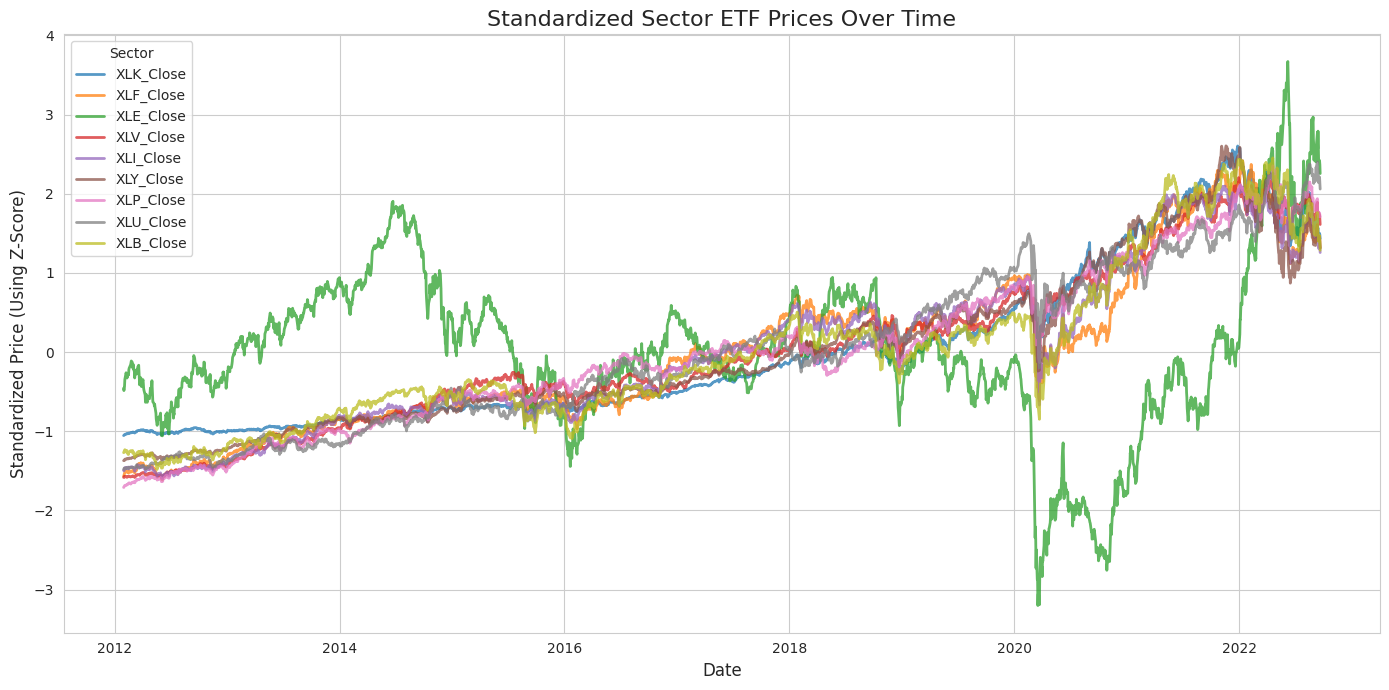

In [ ]:
# Extract just these columns
df_sectors = df_merged[target_cols]

# Standardize the values
scaler = StandardScaler()
df_standardized = pd.DataFrame(
  scaler.fit_transform(df_sectors),
  columns=df_sectors.columns,
  index=df_sectors.index
)

# Create the plot
plt.figure(figsize=(14, 7))

# Plot the sectors on the same plot
for column in df_standardized.columns:
  sns.lineplot(
    data=df_standardized,
    x=df_standardized.index,
    y=column,
    label=column,
    linewidth=2,
    alpha = 0.75 # transparency, allows you to see multiple prices when they overlap
  )

plt.title("Standardized Sector ETF Prices Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Standardized Price (Using Z-Score)", fontsize=12)
plt.legend(title="Sector", loc="upper left")
plt.tight_layout();

It can be seen that 8 out of the 9 ETFs have very similar trends over time. XLE (the energy sector ETF) appears to follow a very different path than the other ETFs, indicating that **XLE could be more difficult to predict**.

Another insight that can be taken from the original time series line plot is that many of the ETFs move similarly to others. This indicates that the price levels of an ETF could have predictive power over the price of another ETF. This result motivates the use of all 9 ETFs' features together in the same model to predict the 9 close prices simultaneously.

To further investigate the degree to which different stocks move together, a correlation heatmap is constructed below.


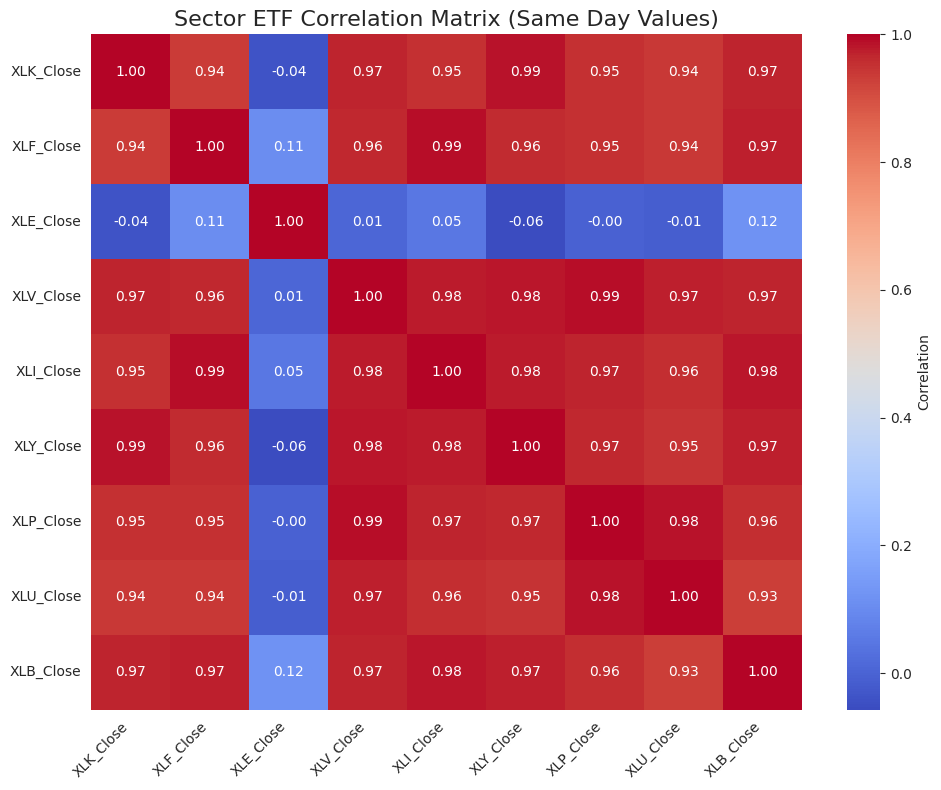

In [ ]:
# Calculate correlation matrix
corr_matrix = df_sectors.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
  corr_matrix,
  annot=True,      # printing the correlations as well
  fmt=".2f",        # rounding to 2 decimal places
  cmap="coolwarm",
  cbar_kws={"label": "Correlation"}
)
plt.title("Sector ETF Correlation Matrix (Same Day Values)", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout();

There are **extremely high linear correlations** between all ETFs except for the energy sector, which has notably very low, and at times negative, correlations with the other ETFs. This means that the energy sector's ETF prices barely move with other ETF prices.

It is important to note that the strong positive correlations in the above heatmap are calculated between each ETF's close prices on the same day. This indicates that the ETFs move together - when one ETF's close price increases, it is very likely that other ETFs' close prices will also increase. However, these correlations are not representative of how well the model will perform, as the LSTM architecture only uses *previous* days' features to determine the *next day's* close price. Using only historical data simulates that we only having access to previous information when predicting the current day's price.

Now that we have visualized the price data, the news sentiment data will be explored - starting with some basic descriptive statistics.

In [ ]:
print("\nSentiment data descriptive statistics:")
df_merged[['sentiment', 'sentiment_std','num_headlines']].describe()


Sentiment data descriptive statistics:


,sentiment,sentiment_std,num_headlines
count,2680.000000,2680.000000,2680.000000
mean,-0.080942,0.240888,5.938302
std,0.254945,0.158213,5.526603
min,-0.904200,0.000000,1.000000
25%,-0.229683,0.112470,2.000000
50%,-0.050474,0.271227,4.000000
75%,0.056131,0.360217,8.000000
max,0.822500,0.751700,33.000000


The mean daily sentiment score of -0.08 shows that daily news headlines are, in general, slightly more negative than they are positive. The minimum number of headlines per day being 1 shows that all days have at least one headline, and there are no missing values. The sentiment standard deviations are always positive (as expected), and have a maximum of ~0.75.

To visualize how the sentiment scores vary with the closeprices, we can construct a series of scatterplots as seen below.

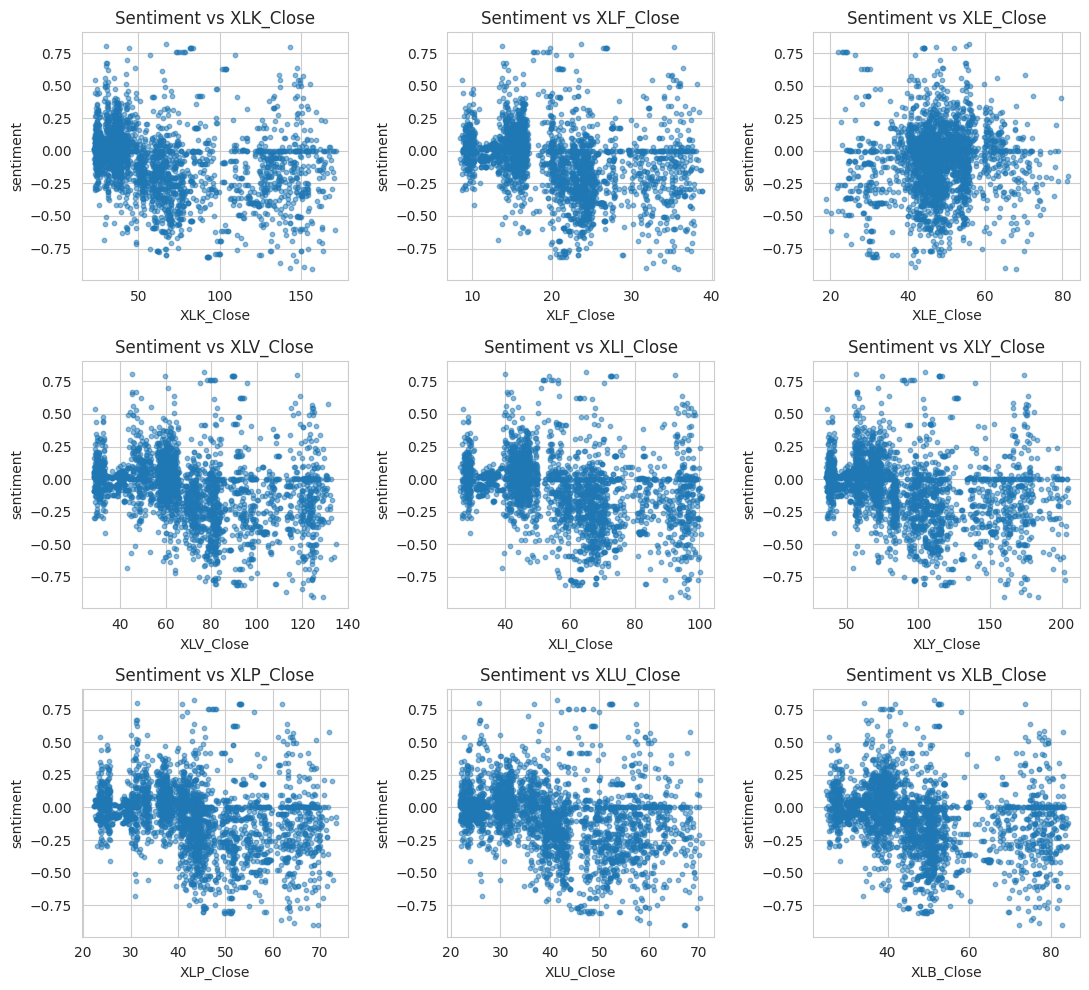

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(11, 10))

for ax, col in zip(axes.flat, target_cols):
    ax.scatter(
        df_merged[col],
        df_merged["sentiment"],
        s=10,        # smaller dots
        alpha=0.5    # transparency
    )
    ax.set_xlabel(col)
    ax.set_ylabel("sentiment")
    ax.set_title(f"Sentiment vs {col}")

plt.tight_layout()
plt.show()

The scatterplots show that the relationships between the sentiment scores and the Close prices are extremely noisy. However, there are some identifiable trends in each plot. This indicates that the LSTM (which can find very complicated temporal patterns) may be able to pick up on some relationship in this data between sentiment scores and Close prices.